# Introduction k-fold Cross Validation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import pandas as pd
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/master/hospital.csv")
df.head()

stay   age  infection_risk   xray  beds  region  nurses
0   7.13  55.7             4.1   39.6   279       4     241
1   8.82  58.2             1.6   51.7    80       2      52
2   8.34  56.9             2.7   74.0   107       3      54
3   8.95  53.7             5.6  122.8   147       4     148
4  11.20  56.5             5.7   88.9   180       1     151

The loss function for the mean is

$$loss(\mu | y) = \sum_{n=1}^N (y_n - \mu)^2$$

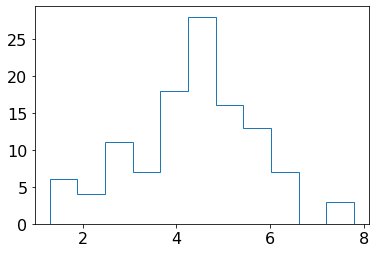

In [3]:
plt.hist(df["infection_risk"], bins = "fd", histtype = "step");

In [4]:
np.mean(df["infection_risk"])

4.354867256637168

In [5]:
dfh = df.head(20)
np.mean(dfh["infection_risk"])

4.745

In [6]:
dft = df.tail(20)
np.mean(dft["infection_risk"])

4.11

In [7]:
def mse(y, yhat):
    return np.mean( (y - yhat) ** 2 )

In [8]:
m = np.mean(dft["infection_risk"])
mse(dfh["infection_risk"], m)

2.0907

In [9]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 204)
mses = []
means = []
for train_idx, test_idx in kf.split(df):
    train_df = df.iloc[train_idx]
    test_df = df.iloc[test_idx]
    m = np.mean(train_df["infection_risk"])
    means.append(m)
    err = mse(test_df["infection_risk"], m)
    mses.append(err)

In [10]:
mdx = np.argmin(mses)
means[mdx]

4.334444444444444